# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
os.listdir()

['.config', 'drive', 'sample_data']

In [3]:
gpus = tf.config.experimental.list_logical_devices("GPU")
gpus

[]

In [4]:
# Avoid OOM error by setting GPU memory Consumption growth
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove Dodgy Images

In [5]:
import cv2
import imghdr

In [14]:
data_dir = 'drive/MyDrive/Datasets/ImageClassification'
os.listdir(data_dir)

['Sad', 'Happy']

In [10]:
img_extension = ["jpg", "png", "jpeg", "bmp"]

In [15]:
for image_class in os.listdir(data_dir):
    if image_class != '.DS_Store':
        for image in os.listdir(os.path.join(data_dir, image_class)):
            if image != '.DS_Store':
                image_path = os.path.join(data_dir, image_class, image)
                try:
                    img = cv2.imread(image_path)
                    tip = imghdr.what(image_path)
                    if tip not in img_extension:
                        print(f'{image_path} Image not in extension List')
                        os.remove(image_path)
                except Exception as e:
                    print(f'Issue with Image {image_path}')
                    # os.remove(image_path)

# 3. Load Dataset

In [16]:
tf.data.Dataset??

In [19]:
data = tf.keras.utils.image_dataset_from_directory('drive/MyDrive/Datasets/ImageClassification')

Found 296 files belonging to 2 classes.


In [20]:
data_itr = data.as_numpy_iterator()
data_itr

In [26]:
# Class 1 represents sad people
# Class 0 represents happy people

batch = data_itr.next()
batch[0]

array([[[[8.31171875e+01, 1.26117188e+02, 1.43117188e+02],
         [9.55156250e+01, 1.39289062e+02, 1.55773438e+02],
         [9.31328125e+01, 1.39132812e+02, 1.53273438e+02],
         ...,
         [8.20000000e+01, 1.31000000e+02, 1.36000000e+02],
         [8.20000000e+01, 1.31000000e+02, 1.36000000e+02],
         [8.20000000e+01, 1.31000000e+02, 1.36000000e+02]],

        [[8.35447998e+01, 1.26544800e+02, 1.43544800e+02],
         [9.04372559e+01, 1.34210693e+02, 1.50695068e+02],
         [9.14791260e+01, 1.37479126e+02, 1.51619751e+02],
         ...,
         [8.24843750e+01, 1.30515625e+02, 1.36416260e+02],
         [8.24843750e+01, 1.30515625e+02, 1.36000000e+02],
         [8.24843750e+01, 1.30515625e+02, 1.36000000e+02]],

        [[8.45460205e+01, 1.27839355e+02, 1.45084351e+02],
         [8.40875244e+01, 1.28065308e+02, 1.44481567e+02],
         [8.95385742e+01, 1.35177124e+02, 1.49397949e+02],
         ...,
         [8.34218750e+01, 1.30000000e+02, 1.37281250e+02],
         [

In [25]:
batch[1]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

In [27]:
# 32 images with shape 256*256 having channel 3
batch[0].shape

(32, 256, 256, 3)

In [28]:
# Labels for the batch
batch[1].shape

(32,)

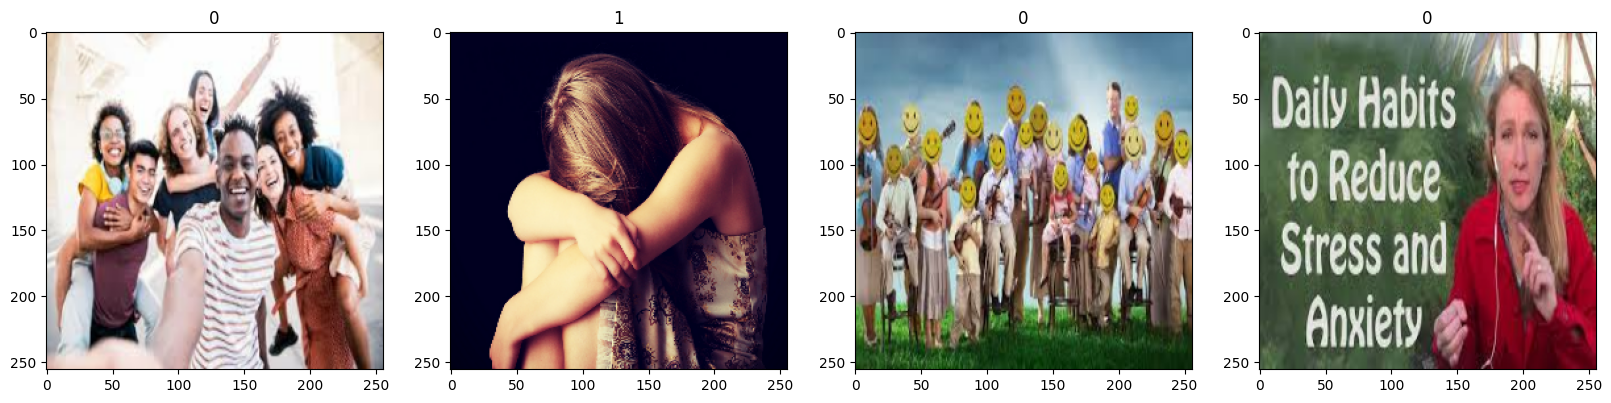

In [23]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# 4. Preprocess the Dataset

### 4.1 Scale the Data

In [29]:
data = data.map(lambda x,y : (x/255, y))


In [34]:
scaled_itr = data.as_numpy_iterator()

In [35]:
batch = scaled_itr.next()

In [36]:
batch[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [37]:
batch[0].max()

1.0

In [38]:
batch[0].min()

0.0

# 5. Split the dataset

In [39]:
len(data)

10

In [40]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train_size+val_size+test_size

10

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Deep Learning Model

### 6.1 Build Deep Learning Model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [49]:
model = Sequential()

In [51]:
# no of filter 16
# filter 3*3
# stride 1
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# no of filter 32
# filter 3*3
# stride 1
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# no of filter 16
# filter 3*3
# stride 1
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

### 6.2 Train Deep Learning Model

In [55]:
logdir = 'drive/MyDrive/Datasets/ImageClassification/logs'
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 0.6256 - accuracy: 0.6920 - val_loss: 0.6151 - val_accuracy: 0.6719
Epoch 2/20
7/7 [==============================] - 21s 2s/step - loss: 0.5719 - accuracy: 0.6920 - val_loss: 0.5806 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 25s 3s/step - loss: 0.5260 - accuracy: 0.7321 - val_loss: 0.4986 - val_accuracy: 0.7500
Epoch 4/20
7/7 [==============================] - 34s 5s/step - loss: 0.4817 - accuracy: 0.8080 - val_loss: 0.4158 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 39s 5s/step - loss: 0.4141 - accuracy: 0.8393 - val_loss: 0.3347 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 32s 4s/step - loss: 0.3703 - accuracy: 0.8661 - val_loss: 0.3598 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.3222 - accuracy: 0.8527 - val_loss: 0.2401 - val_accuracy: 0.9062
Epoch 8/20
7/7 [==================

### 6.3 Plot Performance

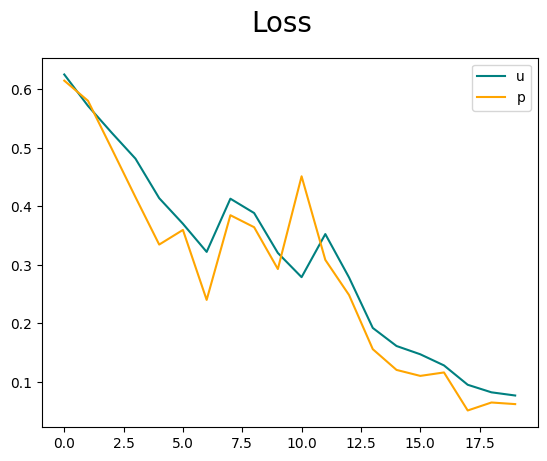

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend('upper left')
plt.show()

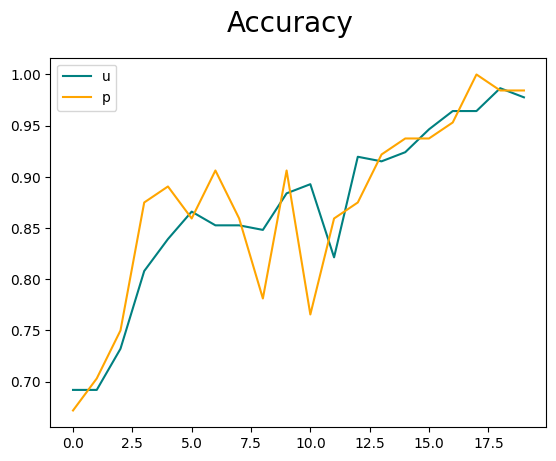

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend('upper left')
plt.show()

# 7. Evaluate Model

# 7.1 Evaluate

In [59]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [60]:
pre = Precision()
re = Recall()
ba = BinaryAccuracy()

In [61]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    ba.update_state(y, yhat)


1/1 [==============================] - 0s 243ms/step
Precision: Precision(name=precision,dtype=float32,thresholds=None,top_k=None,class_id=None) Recall: Recall(name=recall,dtype=float32,thresholds=None,top_k=None,class_id=None) BinaryAccuracyBinaryAccuracy(name=binary_accuracy,dtype=float32,threshold=0.5)


In [63]:
print(f'Precision: {pre.result().numpy()} Recall: {re.result().numpy()} BinaryAccuracy{ba.result().numpy()}')

Precision: 1.0 Recall: 1.0 BinaryAccuracy1.0


### 7.1 Test

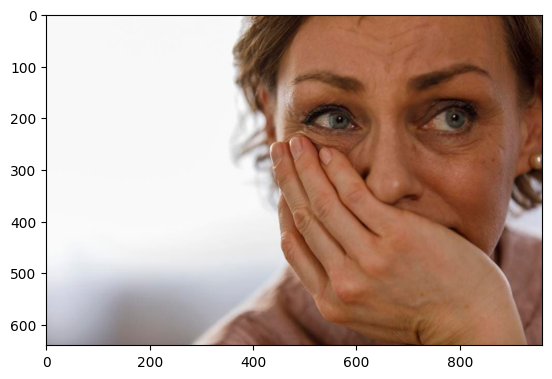

In [69]:
img = cv2.imread('/content/drive/MyDrive/Datasets/ImageClassification/Sad/960x0.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

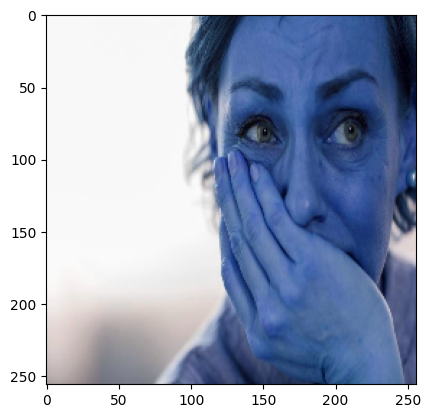

In [70]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 60ms/step


array([[0.7165514]], dtype=float32)

In [72]:
if yhat>0.5:
  print(f'Predicted Class is sad')
else:
  print(f'Predicted Class is Happy')

Predicted Class is sad


# 8. Save the model

In [74]:
from tensorflow.keras.models import load_model

In [77]:
model.save('imageClassification.h5')

In [78]:
new_model = load_model('/content/data_dir/imageClassification.h5')

In [79]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))
yhat_new

1/1 [==============================] - 0s 184ms/step


array([[0.7165514]], dtype=float32)

In [80]:
if yhat_new>0.5:
  print(f'Predicted Class is sad')
else:
  print(f'Predicted Class is Happy')

Predicted Class is sad
